<a href="https://colab.research.google.com/github/mraaheb/DataMining/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 — Load the Preprocessed Dataset

We begin Phase 3 by loading the preprocessed dataset generated in Phase 2.  
This dataset is already cleaned and encoded, so it is ready for applying K-means clustering.


In [37]:
import pandas as pd

df = pd.read_csv("lung_cancer_preprocessed.csv")
print(df.shape)
df.head()



(50000, 11)


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,2,1,0.660248,2,0,0,1,1,0,No
1,100001,0,0,0.127785,2,0,1,1,1,1,Yes
2,100002,2,0,0.004055,1,1,1,1,0,0,Yes
3,100003,2,0,0.440640,0,0,1,0,1,0,Yes
4,100004,0,0,0.444313,1,1,0,1,0,1,Yes


## Phase 3 – Part 2: K-Means Clustering

In this part, we apply K-Means clustering to discover natural groups in the preprocessed lung cancer dataset.  
We will:

1. Prepare the feature matrix by removing non-informative columns (ID and class label).
2. Standardize all numeric attributes so that they are on a comparable scale.
3. Apply K-Means with three different values of K (K = 2, 3, 4).
4. Evaluate and compare the clustering results using:
   - Inertia (within-cluster sum of squares / Elbow method)
   - Silhouette coefficient
5. Interpret the clusters and discuss what they reveal about patient risk profiles.


In [38]:
import pandas as pd

# 1) Prepare feature matrix for K-Means
# Drop ID and class label, we don't want them in clustering
cols_to_drop = ['patient_id', 'lung_cancer']  # adjust if your column names differ
feature_cols = [c for c in df.columns if c not in cols_to_drop]

X = df[feature_cols]

print("Feature columns used for clustering:")
print(feature_cols)

print("\nShape of X:", X.shape)
print("\nData types:")
print(X.dtypes)

print("\nFirst 5 rows of features:")
X.head()


Feature columns used for clustering:
['age', 'gender', 'pack_years', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption', 'family_history']

Shape of X: (50000, 9)

Data types:
age                            int64
gender                         int64
pack_years                   float64
radon_exposure                 int64
asbestos_exposure              int64
secondhand_smoke_exposure      int64
copd_diagnosis                 int64
alcohol_consumption            int64
family_history                 int64
dtype: object

First 5 rows of features:


,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history
0,2,1,0.660248,2,0,0,1,1,0
1,0,0,0.127785,2,0,1,1,1,1
2,2,0,0.004055,1,1,1,1,0,0
3,2,0,0.440640,0,0,1,0,1,0
4,0,0,0.444313,1,1,0,1,0,1


### 2.1 Determining the Optimal Number of Clusters (K)
To perform K-Means clustering effectively, we first need to determine the optimal number of clusters ($K$).
We will test different values of $K$ (from 2 to 10) and evaluate them using two methods:
1. **Elbow Method (Inertia):** To measure the compactness of clusters.
2. **Silhouette Coefficient:** To measure how well the clusters are separated.

Running K-Means for different K values... This might take a minute.
K=2: Inertia=141270.13, Silhouette=0.1482
K=3: Inertia=124264.60, Silhouette=0.1446
K=4: Inertia=112120.75, Silhouette=0.1494
K=5: Inertia=104189.03, Silhouette=0.1416
K=6: Inertia=97983.29, Silhouette=0.1420
K=7: Inertia=93387.29, Silhouette=0.1316
K=8: Inertia=89985.17, Silhouette=0.1265
K=9: Inertia=86969.90, Silhouette=0.1256
K=10: Inertia=85130.91, Silhouette=0.1317


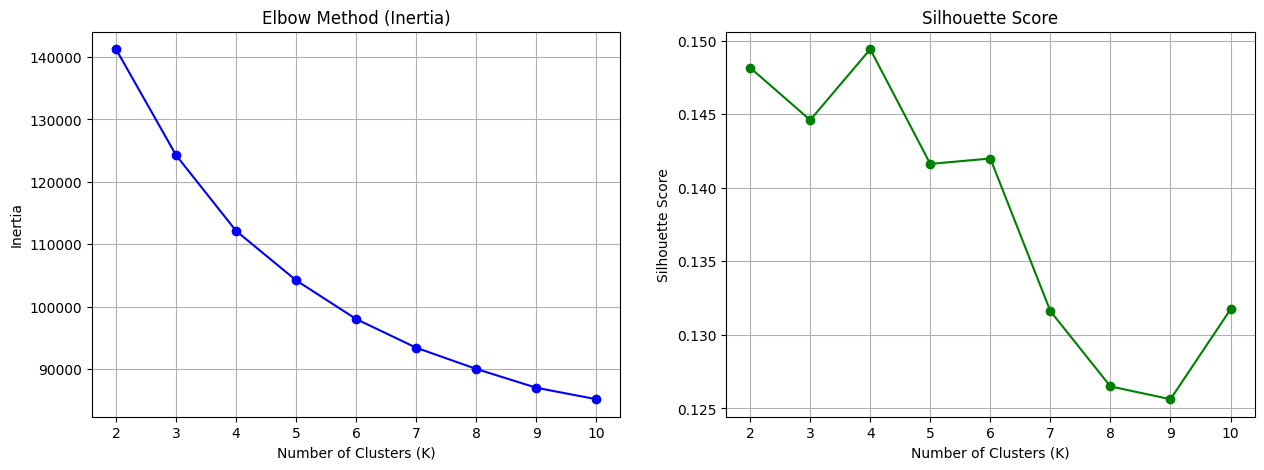

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lists to store the results
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Testing K from 2 to 10

print("Running K-Means for different K values... This might take a minute.")

for k in K_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the model on your data X
    kmeans.fit(X)

    # Append inertia (Sum of squared distances to the closest cluster center)
    inertia.append(kmeans.inertia_)

    # Calculate Silhouette Score (Quality of clusters)
    # Note: Sample size is used to speed up calculation on large datasets (50k rows)
    score = silhouette_score(X, kmeans.labels_, sample_size=5000, random_state=42)
    silhouette_scores.append(score)

    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={score:.4f}")

# --- Plotting the Results ---

fig, ax1 = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Elbow Method (Inertia)
ax1[0].plot(K_range, inertia, marker='o', color='blue')
ax1[0].set_title('Elbow Method (Inertia)')
ax1[0].set_xlabel('Number of Clusters (K)')
ax1[0].set_ylabel('Inertia')
ax1[0].grid(True)

# Plot 2: Silhouette Score
ax1[1].plot(K_range, silhouette_scores, marker='o', color='green')
ax1[1].set_title('Silhouette Score')
ax1[1].set_xlabel('Number of Clusters (K)')
ax1[1].set_ylabel('Silhouette Score')
ax1[1].grid(True)

plt.show()

### Analysis and Justification of K Choices:
Based on the graphs above, we observed the following:
* **Silhouette Score:** The highest score is achieved at **K=4** (approx 0.149), which indicates the best cluster quality. **K=2** also shows a strong score (approx 0.148).
* **Elbow Method:** The inertia decreases rapidly and starts to flatten (form an elbow) around **K=4**.

**Decision:**
For this phase, we select **K = 2, 4, and 6** for the following reasons:
1.  **K=4:** This appears to be the **optimal number** of clusters (Highest Silhouette score + Elbow point).
2.  **K=2:** It has the second-best Silhouette score, representing a simple segmentation (e.g., High Risk vs. Low Risk).
3.  **K=6:** We selected a higher value to **compare** and observe how increasing clusters affects the model performance (note that the Silhouette score drops significantly after K=6).

### 2.2 Clustering Implementation and Visual Comparison

Based on the previous analysis (Elbow Method and Silhouette Score), we selected **K=2, K=4, and K=6** for detailed comparison.

In this step, we will:
1.  **Run K-Means** for each selected K value on the dataset.
2.  **Evaluate the models** using Inertia (WCSS) and Silhouette Score.
3.  **Visualize the clusters** using PCA (Principal Component Analysis) to project the 11-dimensional data into a 2D scatter plot.

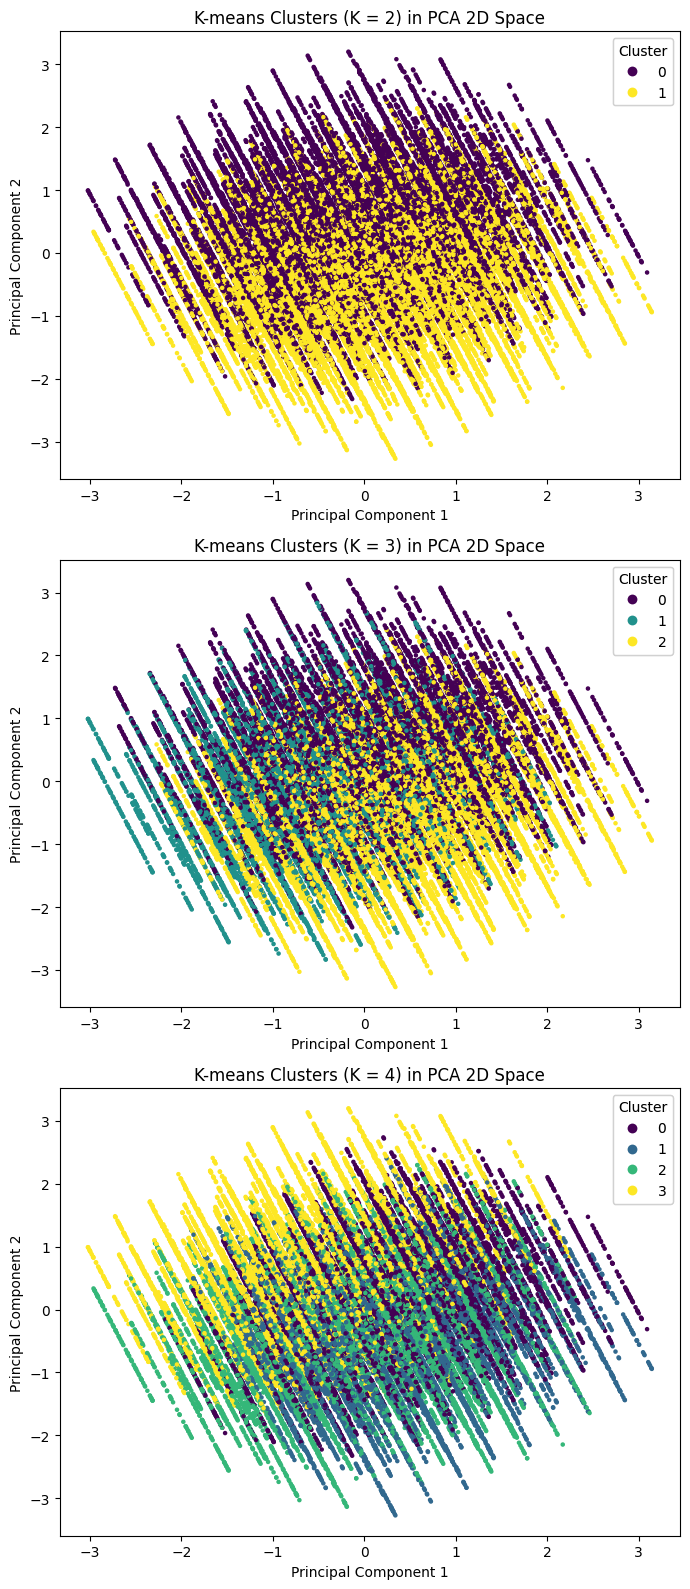

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1) Prepare data for PCA (use all feature columns, without the cluster labels)
feature_cols = [c for c in X_scaled_df.columns if not c.startswith("cluster_")]
X_features = X_scaled_df[feature_cols]

# 2) Apply PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_features)

# Put PCA result in a DataFrame for convenience
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster_k2"] = X_scaled_df["cluster_k2"]
pca_df["cluster_k3"] = X_scaled_df["cluster_k3"]
pca_df["cluster_k4"] = X_scaled_df["cluster_k4"]

# 3) Plot clusters for K = 2, 3, 4 (three separate subplots)
fig, axes = plt.subplots(3, 1, figsize=(7, 16))

cluster_cols = [("cluster_k2", 2), ("cluster_k3", 3), ("cluster_k4", 4)]

for ax, (col, k) in zip(axes, cluster_cols):
    scatter = ax.scatter(
        pca_df["PC1"],
        pca_df["PC2"],
        c=pca_df[col],
        s=5
    )
    ax.set_title(f"K-means Clusters (K = {k}) in PCA 2D Space")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
    ax.add_artist(legend1)

plt.tight_layout()
plt.show()


### 5. Cluster Visualization using PCA (2D Scatter Plots)

In this section, we project the scaled features into 2D using PCA (Principal Component Analysis) and visualize the K-means clusters for K = 2, 3, and 4. This helps us visually inspect how well the clusters are separated in a lower-dimensional space.


In [24]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1) Remove cluster label columns before applying PCA
feature_cols = [c for c in X_scaled_df.columns if not c.startswith("cluster_")]
X_for_pca = X_scaled_df[feature_cols].values

# 2) Apply PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_for_pca)

# 3) Build a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["cluster_k2"] = clusters_2
pca_df["cluster_k3"] = clusters_3
pca_df["cluster_k4"] = clusters_4

# 4) (Optional) sample a subset for clearer visualization
sample_size = 4000
if len(pca_df) > sample_size:
    pca_df_sample = pca_df.sample(n=sample_size, random_state=42)
else:
    pca_df_sample = pca_df

print("PCA shape:", pca_df_sample.shape)
pca_df_sample.head()


PCA shape: (4000, 5)


,PC1,PC2,cluster_k2,cluster_k3,cluster_k4
33553,0.444910,-0.384291,1,2,1
9427,1.328151,1.556744,1,2,2
199,-0.318981,1.589418,0,1,0
12447,0.647766,1.895856,0,0,0
39489,0.713690,-0.297047,0,0,0


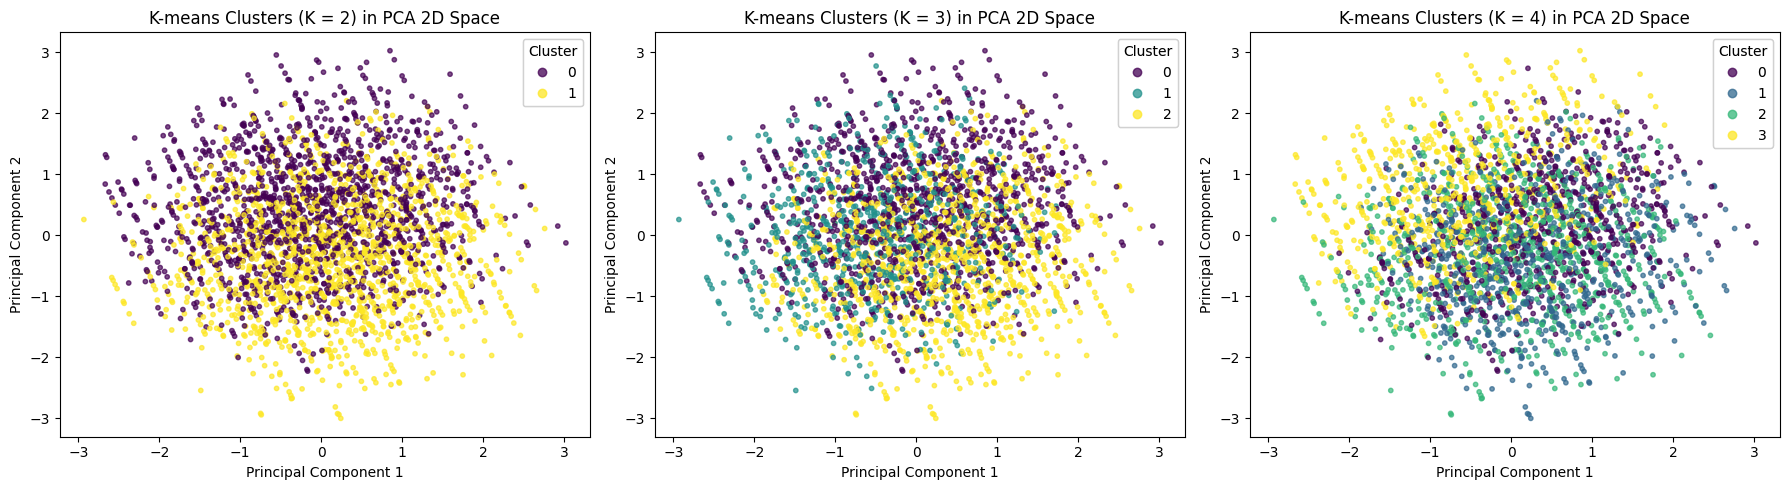

In [28]:
# 5.x – PCA visualization with downsampling
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1) Select only feature columns (exclude cluster label columns)
feature_cols = [c for c in X_scaled_df.columns if not c.startswith('cluster_')]
X_for_pca = X_scaled_df[feature_cols].values

# 2) Fit PCA to reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_for_pca)

# 3) Downsample points for clearer plotting
#    We keep at most 3000 points to avoid over-plotting
n_points = 3000

if X_pca.shape[0] > n_points:
    idx = np.random.choice(X_pca.shape[0], size=n_points, replace=False)
else:
    idx = np.arange(X_pca.shape[0])

X_pca_sample = X_pca[idx]
labels_k2_sample = X_scaled_df['cluster_k2'].values[idx]
labels_k3_sample = X_scaled_df['cluster_k3'].values[idx]
labels_k4_sample = X_scaled_df['cluster_k4'].values[idx]

# 4) Create three scatter plots for K = 2, 3, 4
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, labels, k in zip(
        axes,
        [labels_k2_sample, labels_k3_sample, labels_k4_sample],
        [2, 3, 4]):

    scatter = ax.scatter(
        X_pca_sample[:, 0],
        X_pca_sample[:, 1],
        c=labels,
        s=10,
        alpha=0.7
    )

    ax.set_title(f'K-means Clusters (K = {k}) in PCA 2D Space')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

    # Legend based on cluster labels
    legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="best")
    ax.add_artist(legend1)

plt.tight_layout()
plt.show()


//////////////////////////////////////////////////////////////////////////////

Running K-Means for K=2, 4, 6...
Finished K=2 -> Inertia: 141270.13, Silhouette: 0.1482
Finished K=4 -> Inertia: 112120.75, Silhouette: 0.1494
Finished K=6 -> Inertia: 97983.29, Silhouette: 0.1420


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


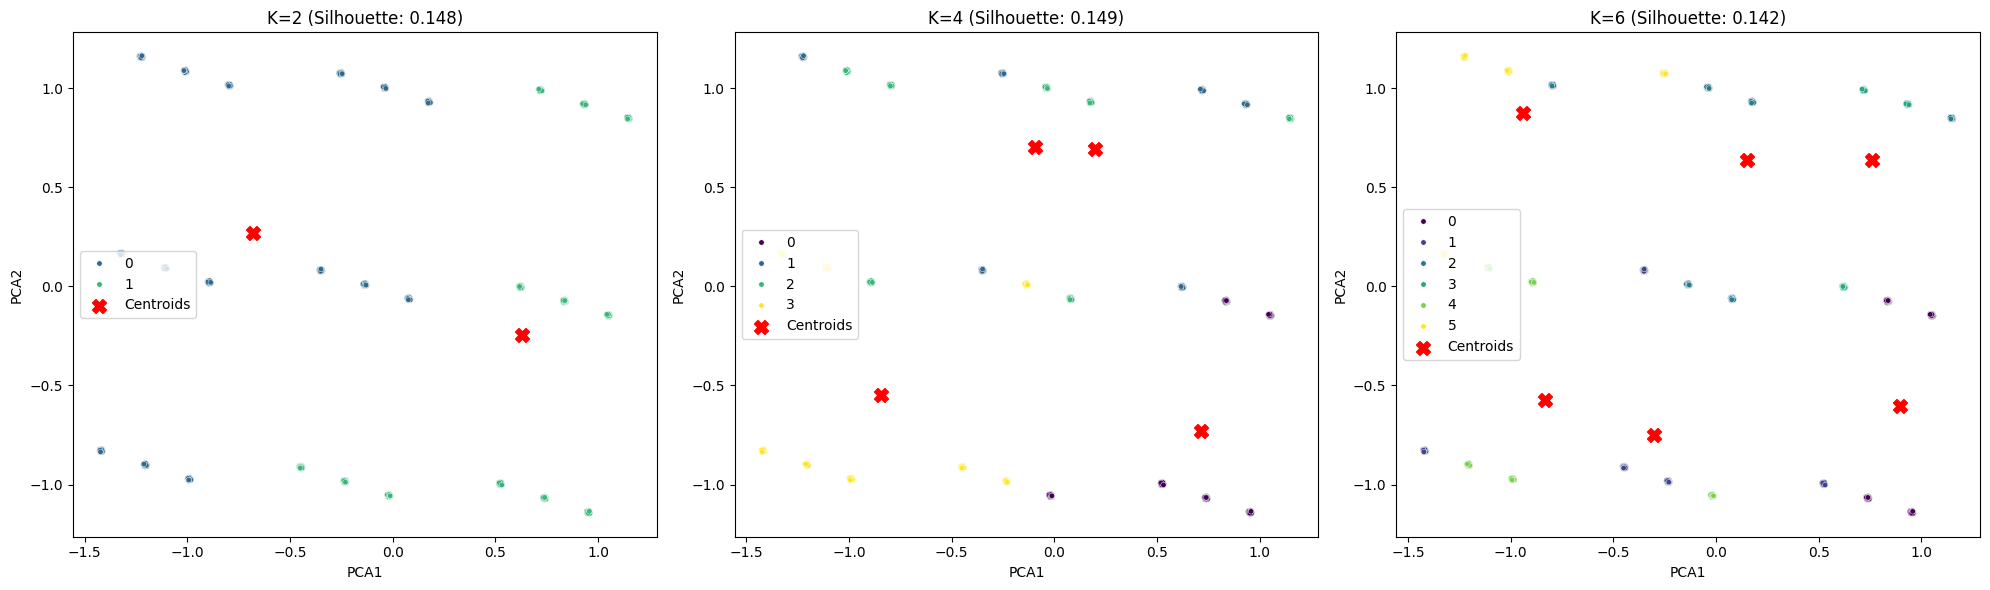

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

# --- Step 1: Apply K-Means for the selected K values and calculate metrics ---

# Initialize dictionaries to store models and results for later use
models = {}
labels_dict = {}
silhouette_scores = {}
inertia_scores = {}
selected_Ks = [2, 4, 6]  # The K values we selected to compare

print("Running K-Means for K=2, 4, 6...")

for k in selected_Ks:
    # 1. Build and train the model (Execute K-Means)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    # 2. Store the model and labels
    models[k] = kmeans
    labels_dict[k] = labels

    # 3. Calculate metrics (Inertia for Elbow & Silhouette Score)
    inertia_scores[k] = kmeans.inertia_
    silhouette_scores[k] = silhouette_score(X, labels, sample_size=5000, random_state=42)

    print(f"Finished K={k} -> Inertia: {inertia_scores[k]:.2f}, Silhouette: {silhouette_scores[k]:.4f}")


# --- Step 2: Visualization and Comparison (PCA Plots) ---

# Prepare PCA for visualization (reduce 11 columns to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Setup the plot figure (3 subplots side-by-side)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, k in enumerate(selected_Ks):
    # Retrieve stored labels and model
    labels = labels_dict[k]
    kmeans = models[k]

    # Add cluster labels to the dataframe for coloring
    df_pca['Cluster'] = labels

    # Create Scatter Plot
    sns.scatterplot(
        data=df_pca, x='PCA1', y='PCA2',
        hue='Cluster', palette='viridis',
        s=15, ax=axes[i], legend='full'
    )

    # Plot Centroids (transform them to PCA space first)
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    axes[i].scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='red', marker='X', label='Centroids')

    # Set titles and labels
    axes[i].set_title(f'K={k} (Silhouette: {silhouette_scores[k]:.3f})')
    axes[i].legend()

plt.tight_layout()
plt.show()